In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from collections import Counter

In [3]:
# Load in Sensory Neuron Table
# CHANGE the name of the tsv file to go between est_counts and tpm
SN = pd.read_csv('SN_table_tpm.tsv', sep='\t')
totalTranscripts = 117486
SN.head()

transcript_id             gene_id  bulk  pseudo_bulk  N2c0  N2c1  \
0  ENSMUST00000178537  ENSMUSG00000095668   0.0          0.0   0.0   0.0   
1  ENSMUST00000178862  ENSMUSG00000094569   0.0          0.0   0.0   0.0   
2  ENSMUST00000196221  ENSMUSG00000096749   0.0          0.0   0.0   0.0   
3  ENSMUST00000179664  ENSMUSG00000096749   0.0          0.0   0.0   0.0   
4  ENSMUST00000177564  ENSMUSG00000096176   0.0          0.0   0.0   0.0   

   N4c0  N4c1  N4c2  N4c3  ...  N128c118  N128c119  N128c120  N128c121  \
0   0.0   0.0   0.0   0.0  ...       0.0       0.0       0.0       0.0   
1   0.0   0.0   0.0   0.0  ...       0.0       0.0       0.0       0.0   
2   0.0   0.0   0.0   0.0  ...       0.0       0.0       0.0       0.0   
3   0.0   0.0   0.0   0.0  ...       0.0       0.0       0.0       0.0   
4   0.0   0.0   0.0   0.0  ...       0.0       0.0       0.0       0.0   

   N128c122  N128c123  N128c124  N128c125  N128c126  N128c127  
0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 218 columns]

In [4]:
# Function that takes a threshold to measure detectable transcripts and a list of the clusters to check in
# Ideally use on set levels of clustering i.e. 2, 4, 16, 64, 128
# Return a list of all detectable transcript IDs at the level
def subset(threshold, clusters):
    columns = ['transcript_id', 'gene_id'] + clusters
    df = SN[columns]
    df = df[(df[clusters] > threshold).any(1)]
    detectable_transcripts = df['transcript_id'].tolist()
    nb_detectable = len(detectable_transcripts)
    return detectable_transcripts, nb_detectable
    
#cluster_list = ['N2c0', 'N2c1']
#detectable_0, nb_detectable_0 = subset(0, cluster_list)

In [5]:
# Graphs the proportion of detectable transcripts for all clustering levels at the threshold given
def get_proportions(threshold):
    proportions = []
    detectable_ids = []
    nb_detectable = []
    
    clusters = ['bulk']
    detectable_bulk, nb_detectable_bulk = subset(threshold, clusters)
    proportions.append(nb_detectable_bulk/117486)
    detectable_ids.append(detectable_bulk)
    nb_detectable.append(nb_detectable_bulk)
    #print(nb_detectable_bulk)
    
    clusters = ['pseudo_bulk']
    detectable_pseudo_bulk, nb_detectable_pseudo_bulk = subset(threshold, clusters)
    proportions.append(nb_detectable_pseudo_bulk/117486)
    detectable_ids.append(detectable_pseudo_bulk)
    nb_detectable.append(nb_detectable_pseudo_bulk)
    #print(nb_detectable_pseudo_bulk)

    clusters = ['N2c0', 'N2c1']
    detectable_2, nb_detectable_2 = subset(threshold, clusters)
    proportions.append(nb_detectable_2/117486)
    detectable_ids.append(detectable_2)
    nb_detectable.append(nb_detectable_2)
    #print(detectable_2[0:50])
    #print(nb_detectable_2)
    

    clusters = ['N4c0', 'N4c1', 'N4c2', 'N4c3']
    detectable_4, nb_detectable_4 = subset(threshold, clusters)
    proportions.append(nb_detectable_4/117486)
    detectable_ids.append(detectable_4)
    nb_detectable.append(nb_detectable_4)
    #print(detectable_4[0:50])
    #print(nb_detectable_4)

    clusters = ['N16c0', 'N16c1', 'N16c2', 'N16c3', 'N16c4', 'N16c5', 'N16c6', 'N16c7', 'N16c8', 'N16c9', 'N16c10', 'N16c11', 'N16c12', 'N16c13', 'N16c14', 'N16c15']
    detectable_16, nb_detectable_16 = subset(threshold, clusters)
    proportions.append(nb_detectable_16/117486)
    detectable_ids.append(detectable_16)
    nb_detectable.append(nb_detectable_16)
    #print(detectable_16[0:50])
    #print(nb_detectable_16)

    clusters = []
    for i in range(64):
        name = 'N64c' + str(i)
        clusters.append(name)

    detectable_64, nb_detectable_64 = subset(threshold, clusters)
    proportions.append(nb_detectable_64/117486)
    detectable_ids.append(detectable_64)
    nb_detectable.append(nb_detectable_64)
    #print(detectable_64[0:50])
    #print(nb_detectable_64)

    clusters = []
    for i in range(128):
        name = 'N128c' + str(i)
        clusters.append(name)

    detectable_128, nb_detectable_128 = subset(threshold, clusters)
    proportions.append(nb_detectable_128/117486)
    detectable_ids.append(detectable_128)
    nb_detectable.append(nb_detectable_128)
    #print(detectable_128[0:50])
    #print(nb_detectable_128)
    
    return detectable_ids, proportions, nb_detectable

### Plot proportion of detectable transcripts per cluster level at different thresholds

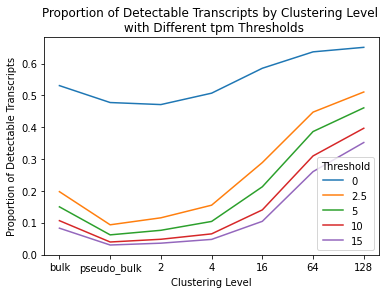

In [5]:
# Get proportion graph with threshold = 0
detectable_ids_0, proportions_0, nb_detectable_0 = get_proportions(0)

# Get proportion graph with threshold = 2.5
detectable_ids_2_5, proportions_2_5, nb_detectable_2_5 = get_proportions(2.5)

# Get proportion graph with threshold = 5
detectable_ids_5, proportions_5, nb_detectable_5 = get_proportions(5)

# Get proportion graph with threshold = 10
detectable_ids_10, proportions_10, nb_detectable_10 = get_proportions(10)

# Get proportion graph with threshold = 15
detectable_ids_15, proportions_15, nb_detectable_15 = get_proportions(15)


#clusteringLevels = ['2', '4', '16', '64', '128']
clusteringLevels = ['bulk', 'pseudo_bulk', '2', '4', '16', '64', '128']
plt.plot(clusteringLevels, proportions_0, label = '0')
plt.plot(clusteringLevels, proportions_2_5, label = '2.5')
plt.plot(clusteringLevels, proportions_5, label = '5')
plt.plot(clusteringLevels, proportions_10, label = '10')
plt.plot(clusteringLevels, proportions_15, label = '15')
plt.xlabel('Clustering Level')
plt.ylabel('Proportion of Detectable Transcripts')

# CHANGE title to either est_counts or TPM
plt.title('Proportion of Detectable Transcripts by Clustering Level \n with Different tpm Thresholds')
plt.legend(title = 'Threshold')

# CHANGE file name to either est_counts or TPM
name = 'proportion_by_threshold_tpm_scaling_1.png'
plt.savefig(name)
plt.show()


In [6]:
# Get proportions and detectable IDs with threshold = 0
detectable_ids_0, proportions_0, nb_detectable_0 = get_proportions(0)

detectable_pseudobulk = detectable_ids_0[1]
detectable_bulk = detectable_ids_0[0]
detectable_128 = detectable_ids_0[6]

print('Detectable in pseudobulk: ', len(detectable_pseudobulk))
print('Detectable in 128: ', len(detectable_128))



s = set(detectable_pseudobulk)
diff = [x for x in detectable_128 if x not in s]
print('Detectable in 128 but not pseudobulk')
print(len(diff))
#print(diff)


s = set(detectable_128)
diff = [x for x in detectable_pseudobulk if x not in s]
print('Detectable in pseudobulk but not 128')
print(len(diff))
#print(diff)

Detectable in pseudobulk:  56116
Detectable in 128:  76494
Detectable in 128 but not pseudobulk
22757
Detectable in pseudobulk but not 128
2379


### Get number of detectable transcripts in bulk, then bulk and pseudo bulk, etc...

In [7]:
# Get proportions and detectable IDs with threshold = 0
detectable_ids_0, proportions_0, nb_detectable_0 = get_proportions(0)

detectable_bulk = detectable_ids_0[0]
detectable_pseudobulk = detectable_ids_0[1]
detectable_2 = detectable_ids_0[2]
detectable_4 = detectable_ids_0[3]
detectable_16 = detectable_ids_0[4]
detectable_64 = detectable_ids_0[5]
detectable_128 = detectable_ids_0[6]

print('Detectable in Bulk (B): ', len(detectable_bulk))

s = set(detectable_pseudobulk)
diff = [x for x in detectable_bulk if x in s]
print('B and PB: ', len(diff))

s = set(detectable_2)
diff = [x for x in diff if x in s]
print('B, PS, 2: ', len(diff))

s = set(detectable_4)
diff = [x for x in diff if x in s]
print('B, PS, 2, 4: ', len(diff))

s = set(detectable_16)
diff = [x for x in diff if x in s]
print('B, PS, 2, 4, 16: ', len(diff))

s = set(detectable_64)
diff = [x for x in diff if x not in s]
print('B, PS, 2, 4, 16, 64: ', len(diff))

s = set(detectable_128)
diff = [x for x in diff if x not in s]
print('B, PS, 2, 4, 16, 64, 128: ', len(diff))

#print(diff)

Detectable in Bulk (B):  62362
B and PB:  43730
B, PS, 2:  41266
B, PS, 2, 4:  41220
B, PS, 2, 4, 16:  41165
B, PS, 2, 4, 16, 64:  68
B, PS, 2, 4, 16, 64, 128:  63


### Plot the number of detectable transcripts per cluster/cluster level

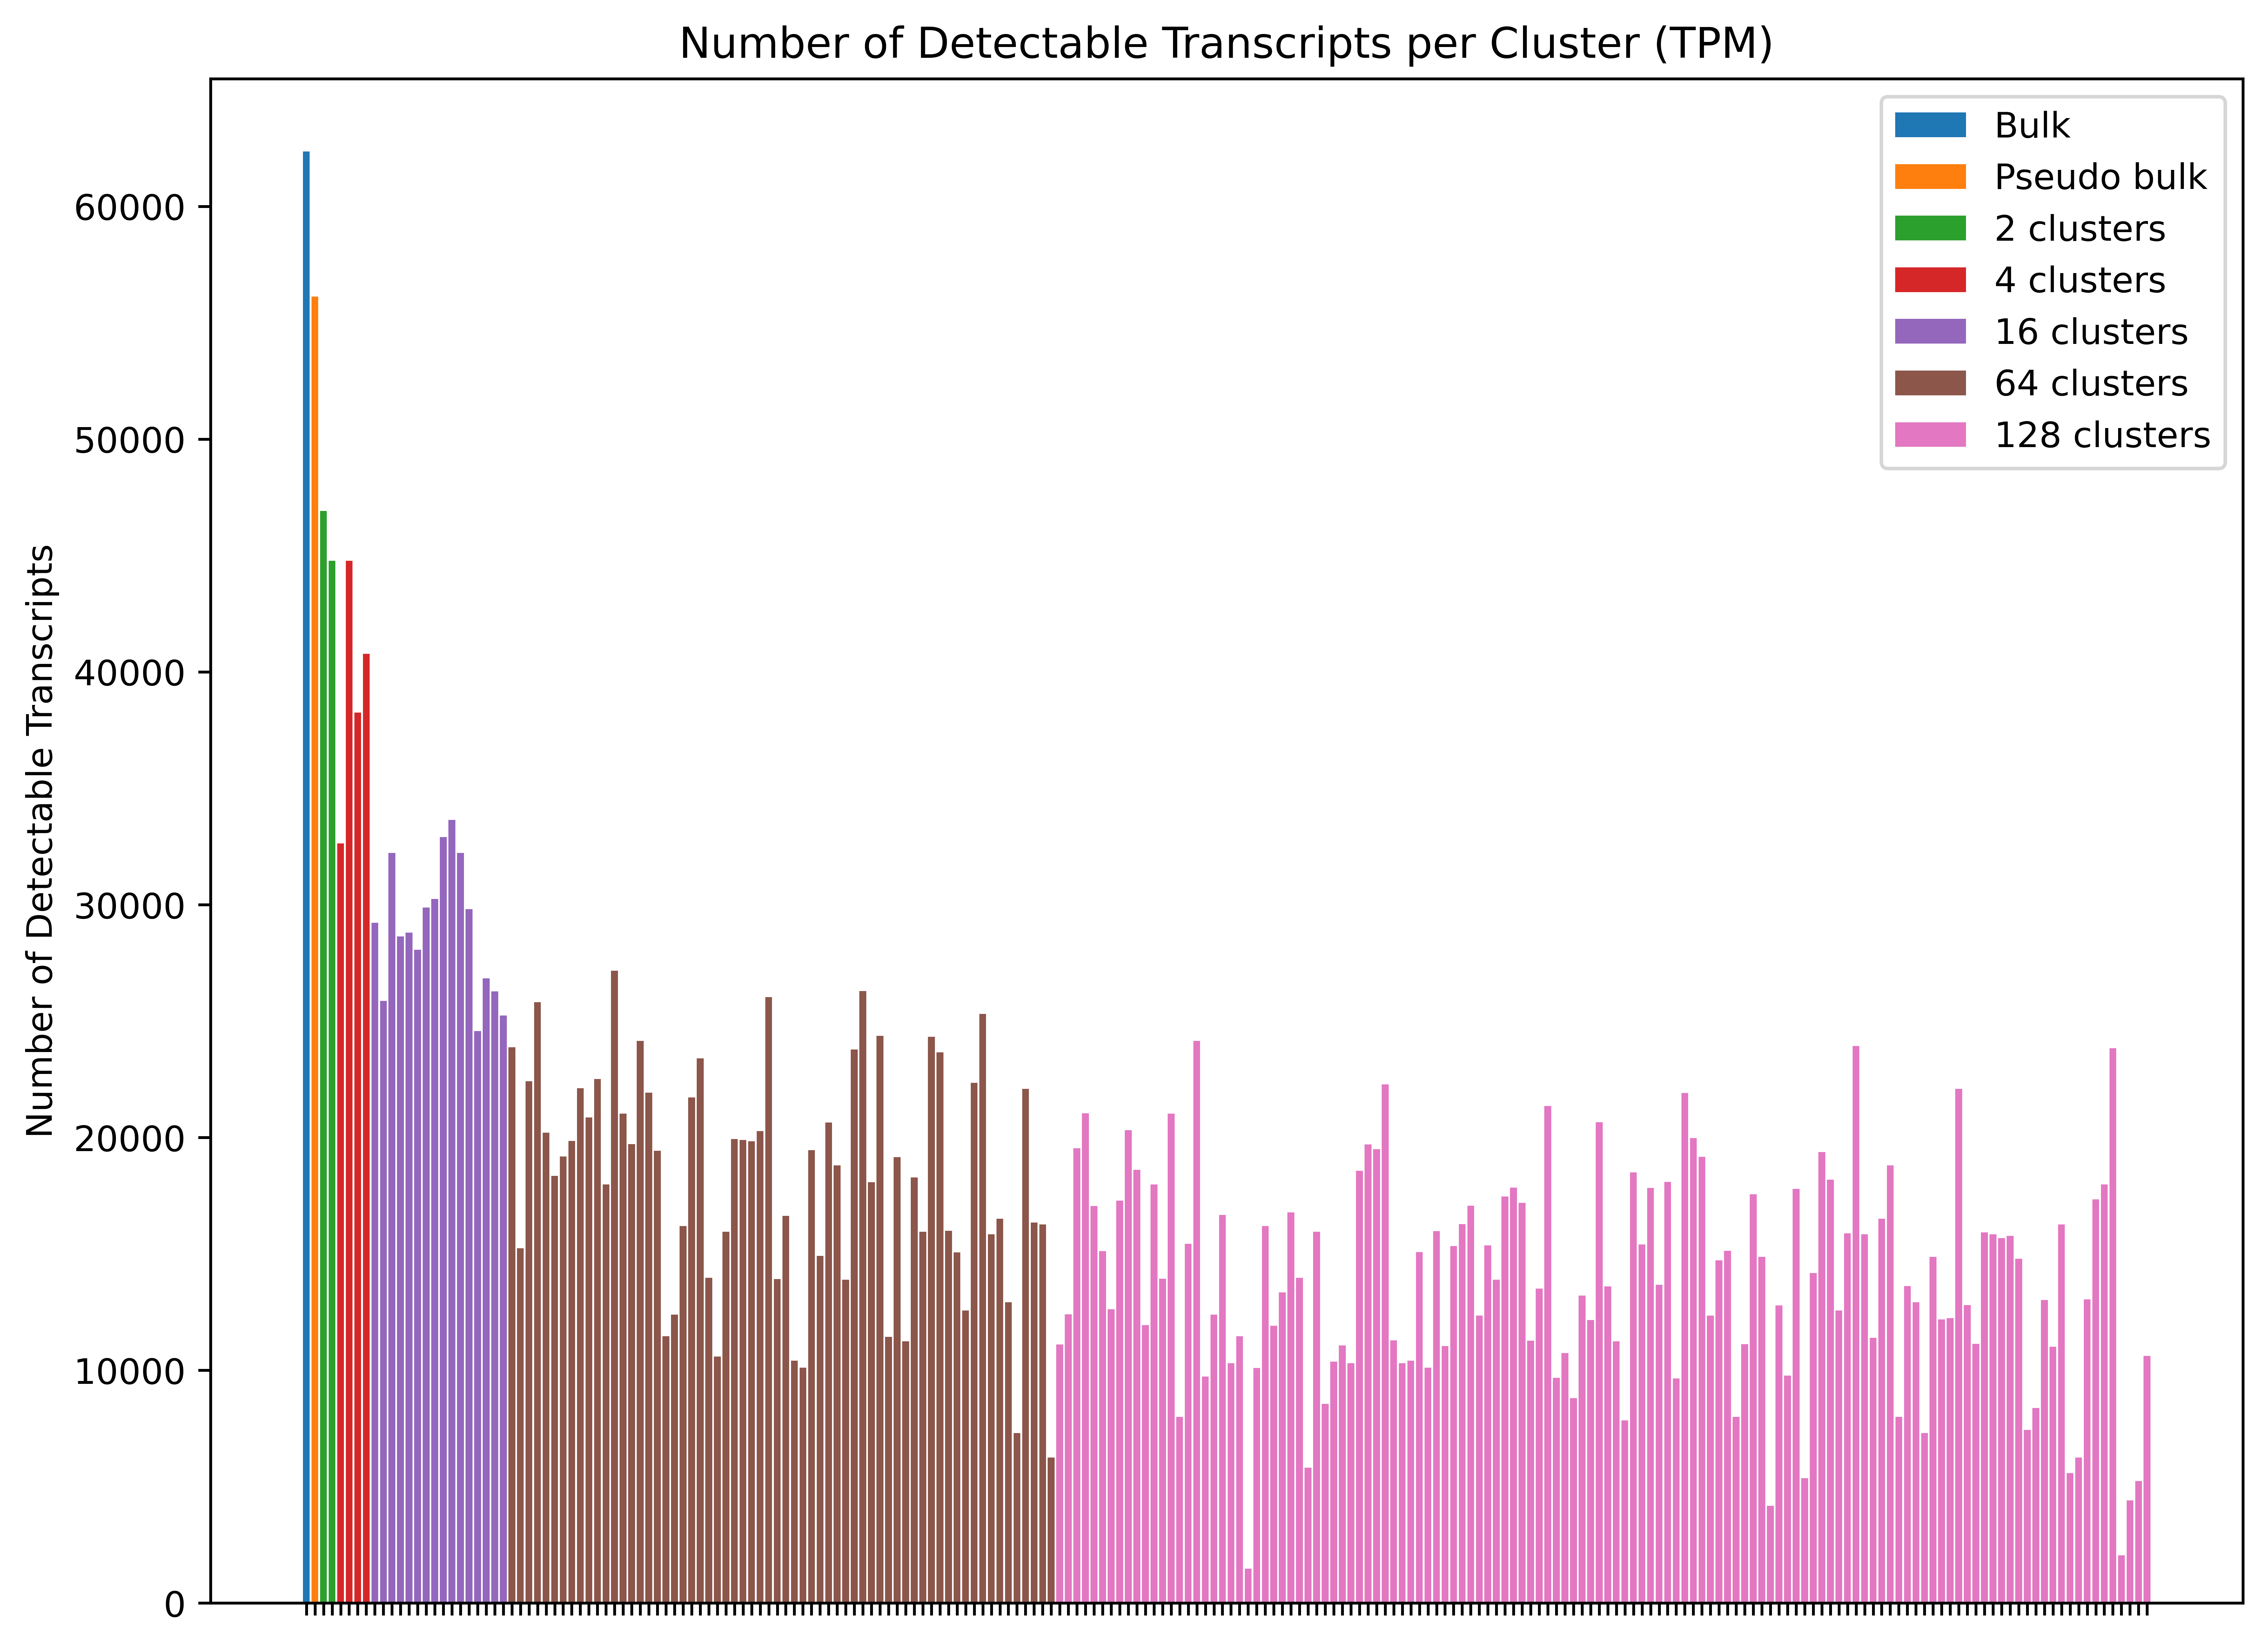

In [8]:
columns = SN.columns.tolist()
columns = columns[2:]

nb_detectable = []

for col in columns:
    clust = [col]
    detectable_ids, nb_detectable_ids = subset(0, clust)
    nb_detectable.append(nb_detectable_ids)


#figure(figsize=(8, 6), dpi=800)
fig = plt.figure(figsize=(8, 6), dpi=800)
ax = fig.add_axes([0,0,1,1])
ax.bar(columns[0], nb_detectable[0], label = 'Bulk')
ax.bar(columns[1], nb_detectable[1], label = 'Pseudo bulk')
ax.bar(columns[2:4], nb_detectable[2:4], label = '2 clusters')
ax.bar(columns[4:8], nb_detectable[4:8], label = '4 clusters')
ax.bar(columns[8:24], nb_detectable[8:24], label = '16 clusters')
ax.bar(columns[24:88], nb_detectable[24:88], label = '64 clusters')
ax.bar(columns[88:], nb_detectable[88:], label = '128 clusters')
plt.legend()
plt.title('Number of Detectable Transcripts per Cluster (TPM)')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.ylabel('Number of Detectable Transcripts')
plt.show()

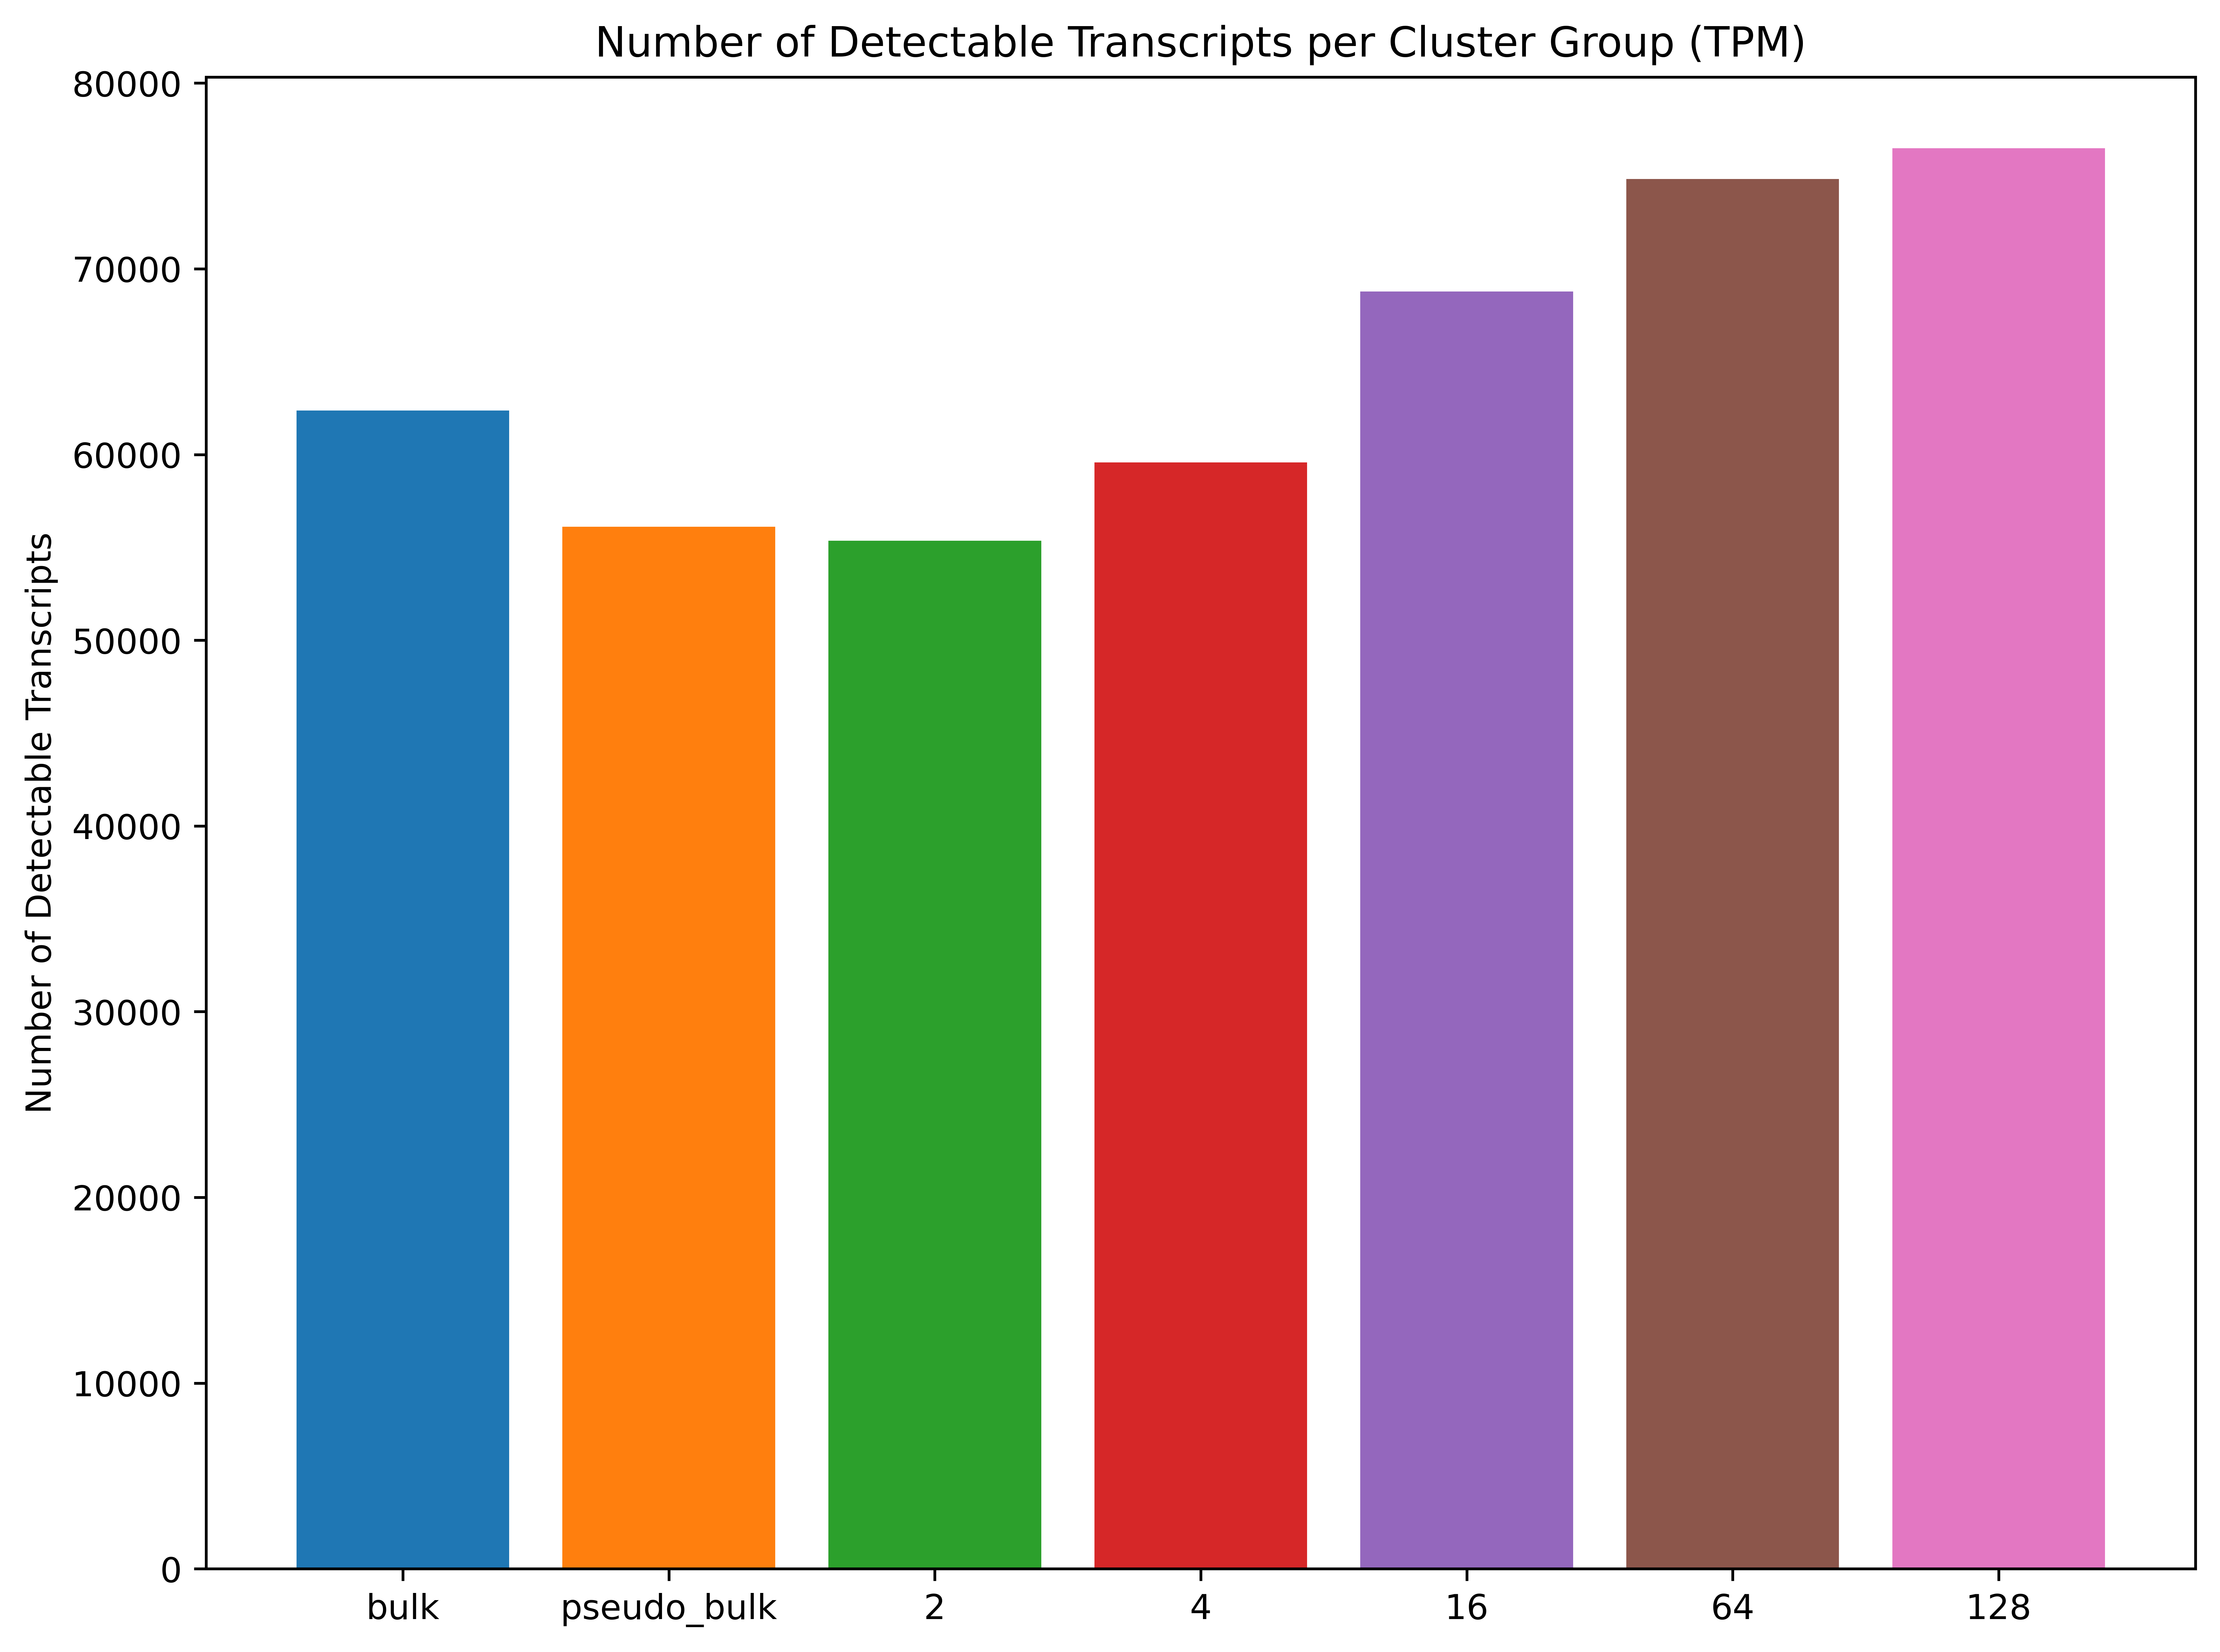

In [9]:
# Get number detectable with threshold = 0 
detectable_ids_0, proportions_0, nb_detectable_0 = get_proportions(0)

clusteringLevels = ['bulk', 'pseudo_bulk', '2', '4', '16', '64', '128']


fig = plt.figure(figsize=(8, 6), dpi=800)
ax = fig.add_axes([0,0,1,1])
ax.bar(clusteringLevels[0], nb_detectable_0[0], label = 'Bulk')
ax.bar(clusteringLevels[1], nb_detectable_0[1], label = 'Pseudo bulk')
ax.bar(clusteringLevels[2], nb_detectable_0[2], label = '2 clusters')
ax.bar(clusteringLevels[3], nb_detectable_0[3], label = '4 clusters')
ax.bar(clusteringLevels[4], nb_detectable_0[4], label = '16 clusters')
ax.bar(clusteringLevels[5], nb_detectable_0[5], label = '64 clusters')
ax.bar(clusteringLevels[6], nb_detectable_0[6], label = '128 clusters')
plt.title('Number of Detectable Transcripts per Cluster Group (TPM)')
plt.ylabel('Number of Detectable Transcripts')
plt.show()

### Heatmap of all transcripts vs all clusters

In [10]:
# Drop gene_id column and use transcript_id as index
data = SN.drop('gene_id', axis=1)
data = data.set_index('transcript_id')

data.head()
figure(figsize=(8, 6), dpi=800)
sns.heatmap(data)
plt.title('With all transcripts and Individual Clusters (TPM)')
plt.show()

### Look at how many transcripts there are per gene

In [11]:
genes = SN['gene_id']
print(len(genes))
geneset = set(genes)
print(len(geneset))

counts = Counter(genes)
#print(counts)

117486
36118


### With the 62 transcripts for transcription factor 4 (ENSMUSG00000053477)

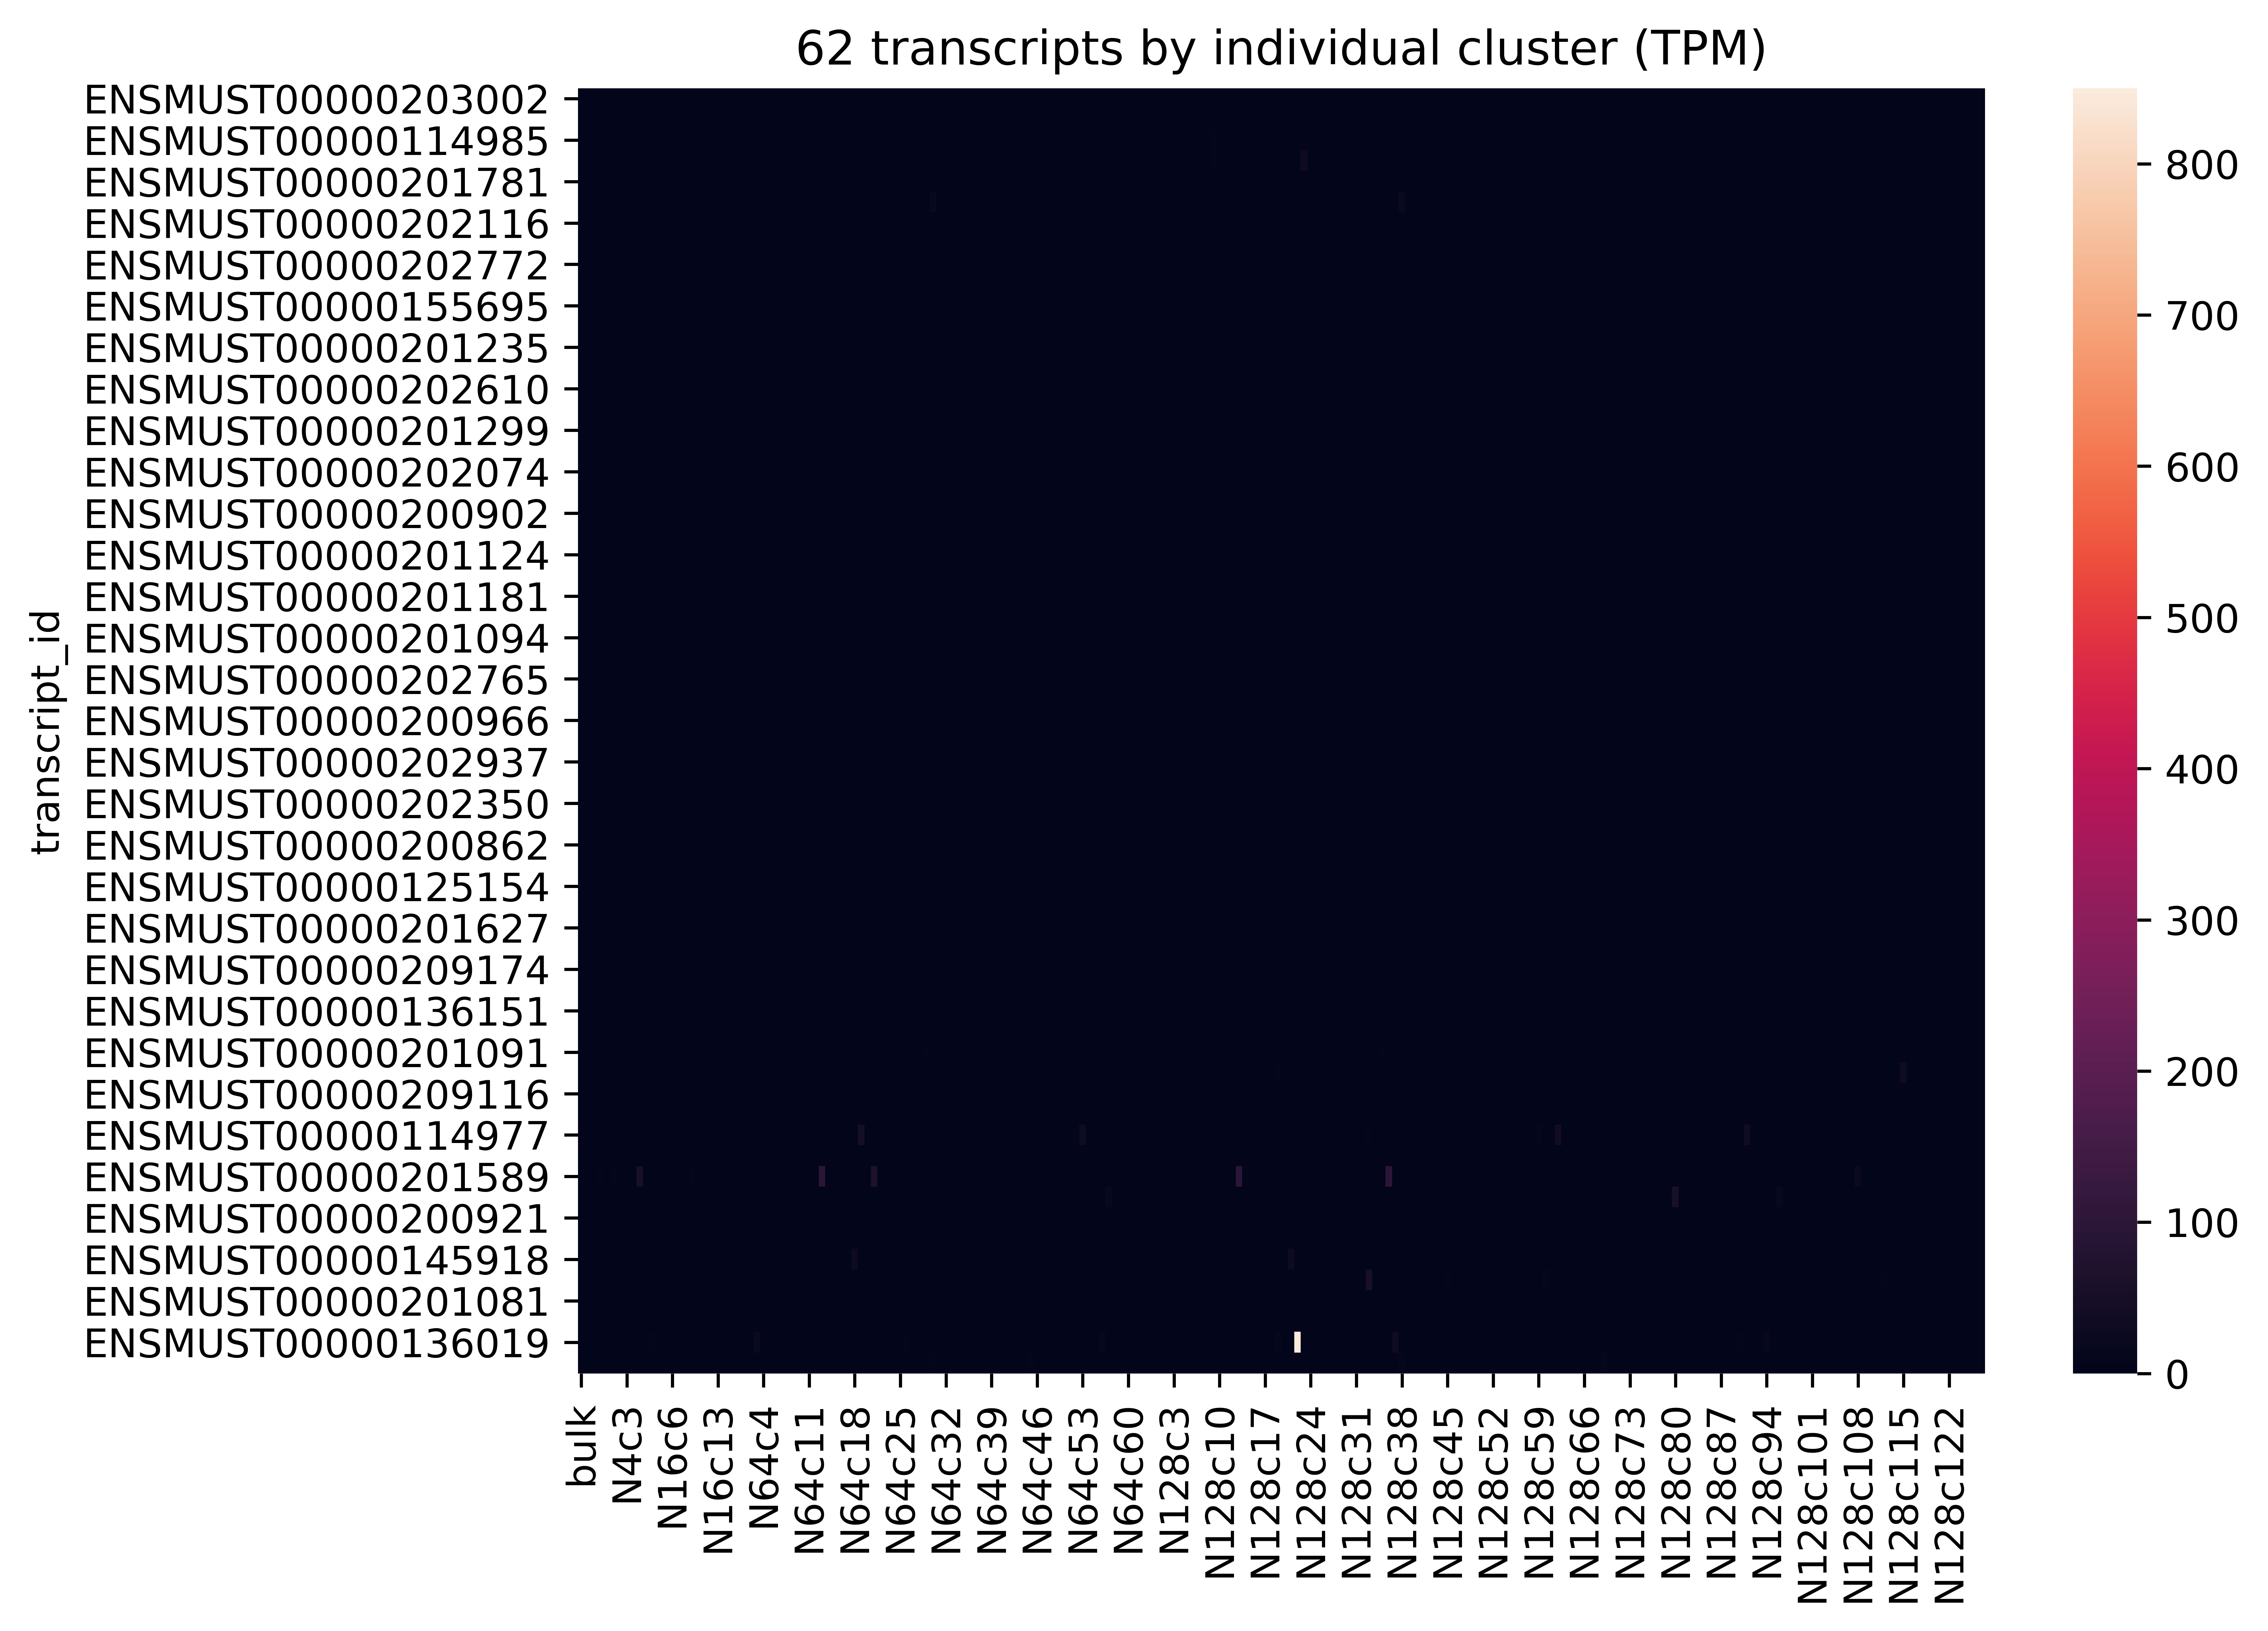

In [12]:
# Get subset of table with only transcripts belonging to the gene with the most transcripts (62)
gene = SN[SN['gene_id'] == 'ENSMUSG00000053477']
gene = gene.drop('gene_id', axis=1)
gene = gene.set_index('transcript_id')

# Plot heatmap with all 62 transcripts vs each cluster
figure(figsize=(8, 6), dpi=800)
sns.heatmap(gene)
plt.title('62 transcripts by individual cluster (TPM)')
plt.show()

# Group clusters by level and take the sum of each transcript
gene_by_clust = pd.DataFrame()

clust_2 = ['N2c0', 'N2c1']
clust_4 = ['N4c0', 'N4c1', 'N4c2', 'N4c3']
clust_16 = ['N16c0', 'N16c1', 'N16c2', 'N16c3', 'N16c4', 'N16c5', 'N16c6', 'N16c7', 'N16c8', 'N16c9', 'N16c10', 'N16c11', 'N16c12', 'N16c13', 'N16c14', 'N16c15']
clust_64 = []
for i in range(64):
    name = 'N64c' + str(i)
    clust_64.append(name)
clust_128 = []
for i in range(128):
    name = 'N128c' + str(i)
    clust_128.append(name)

gene_by_clust['bulk'] = gene['bulk']
gene_by_clust['pseudo_bulk'] = gene['pseudo_bulk']
gene_by_clust["clust_2"] = gene[clust_2].sum(axis=1)
gene_by_clust["clust_4"] = gene[clust_4].sum(axis=1)
gene_by_clust["clust_16"] = gene[clust_16].sum(axis=1)
gene_by_clust["clust_64"] = gene[clust_64].sum(axis=1)
gene_by_clust["clust_128"] = gene[clust_128].sum(axis=1)

# Plot the heatmap with all 62 transcripts vs each cluster LEVEL
figure(figsize=(8, 6), dpi=800)
sns.heatmap(gene_by_clust)
plt.title('62 transcripts by cluster group (TPM)')
plt.show()

### With the 3 transcripts for the eukaryotic translation elongation factor 2 (ENSMUSG00000034994), a housekeeping gene

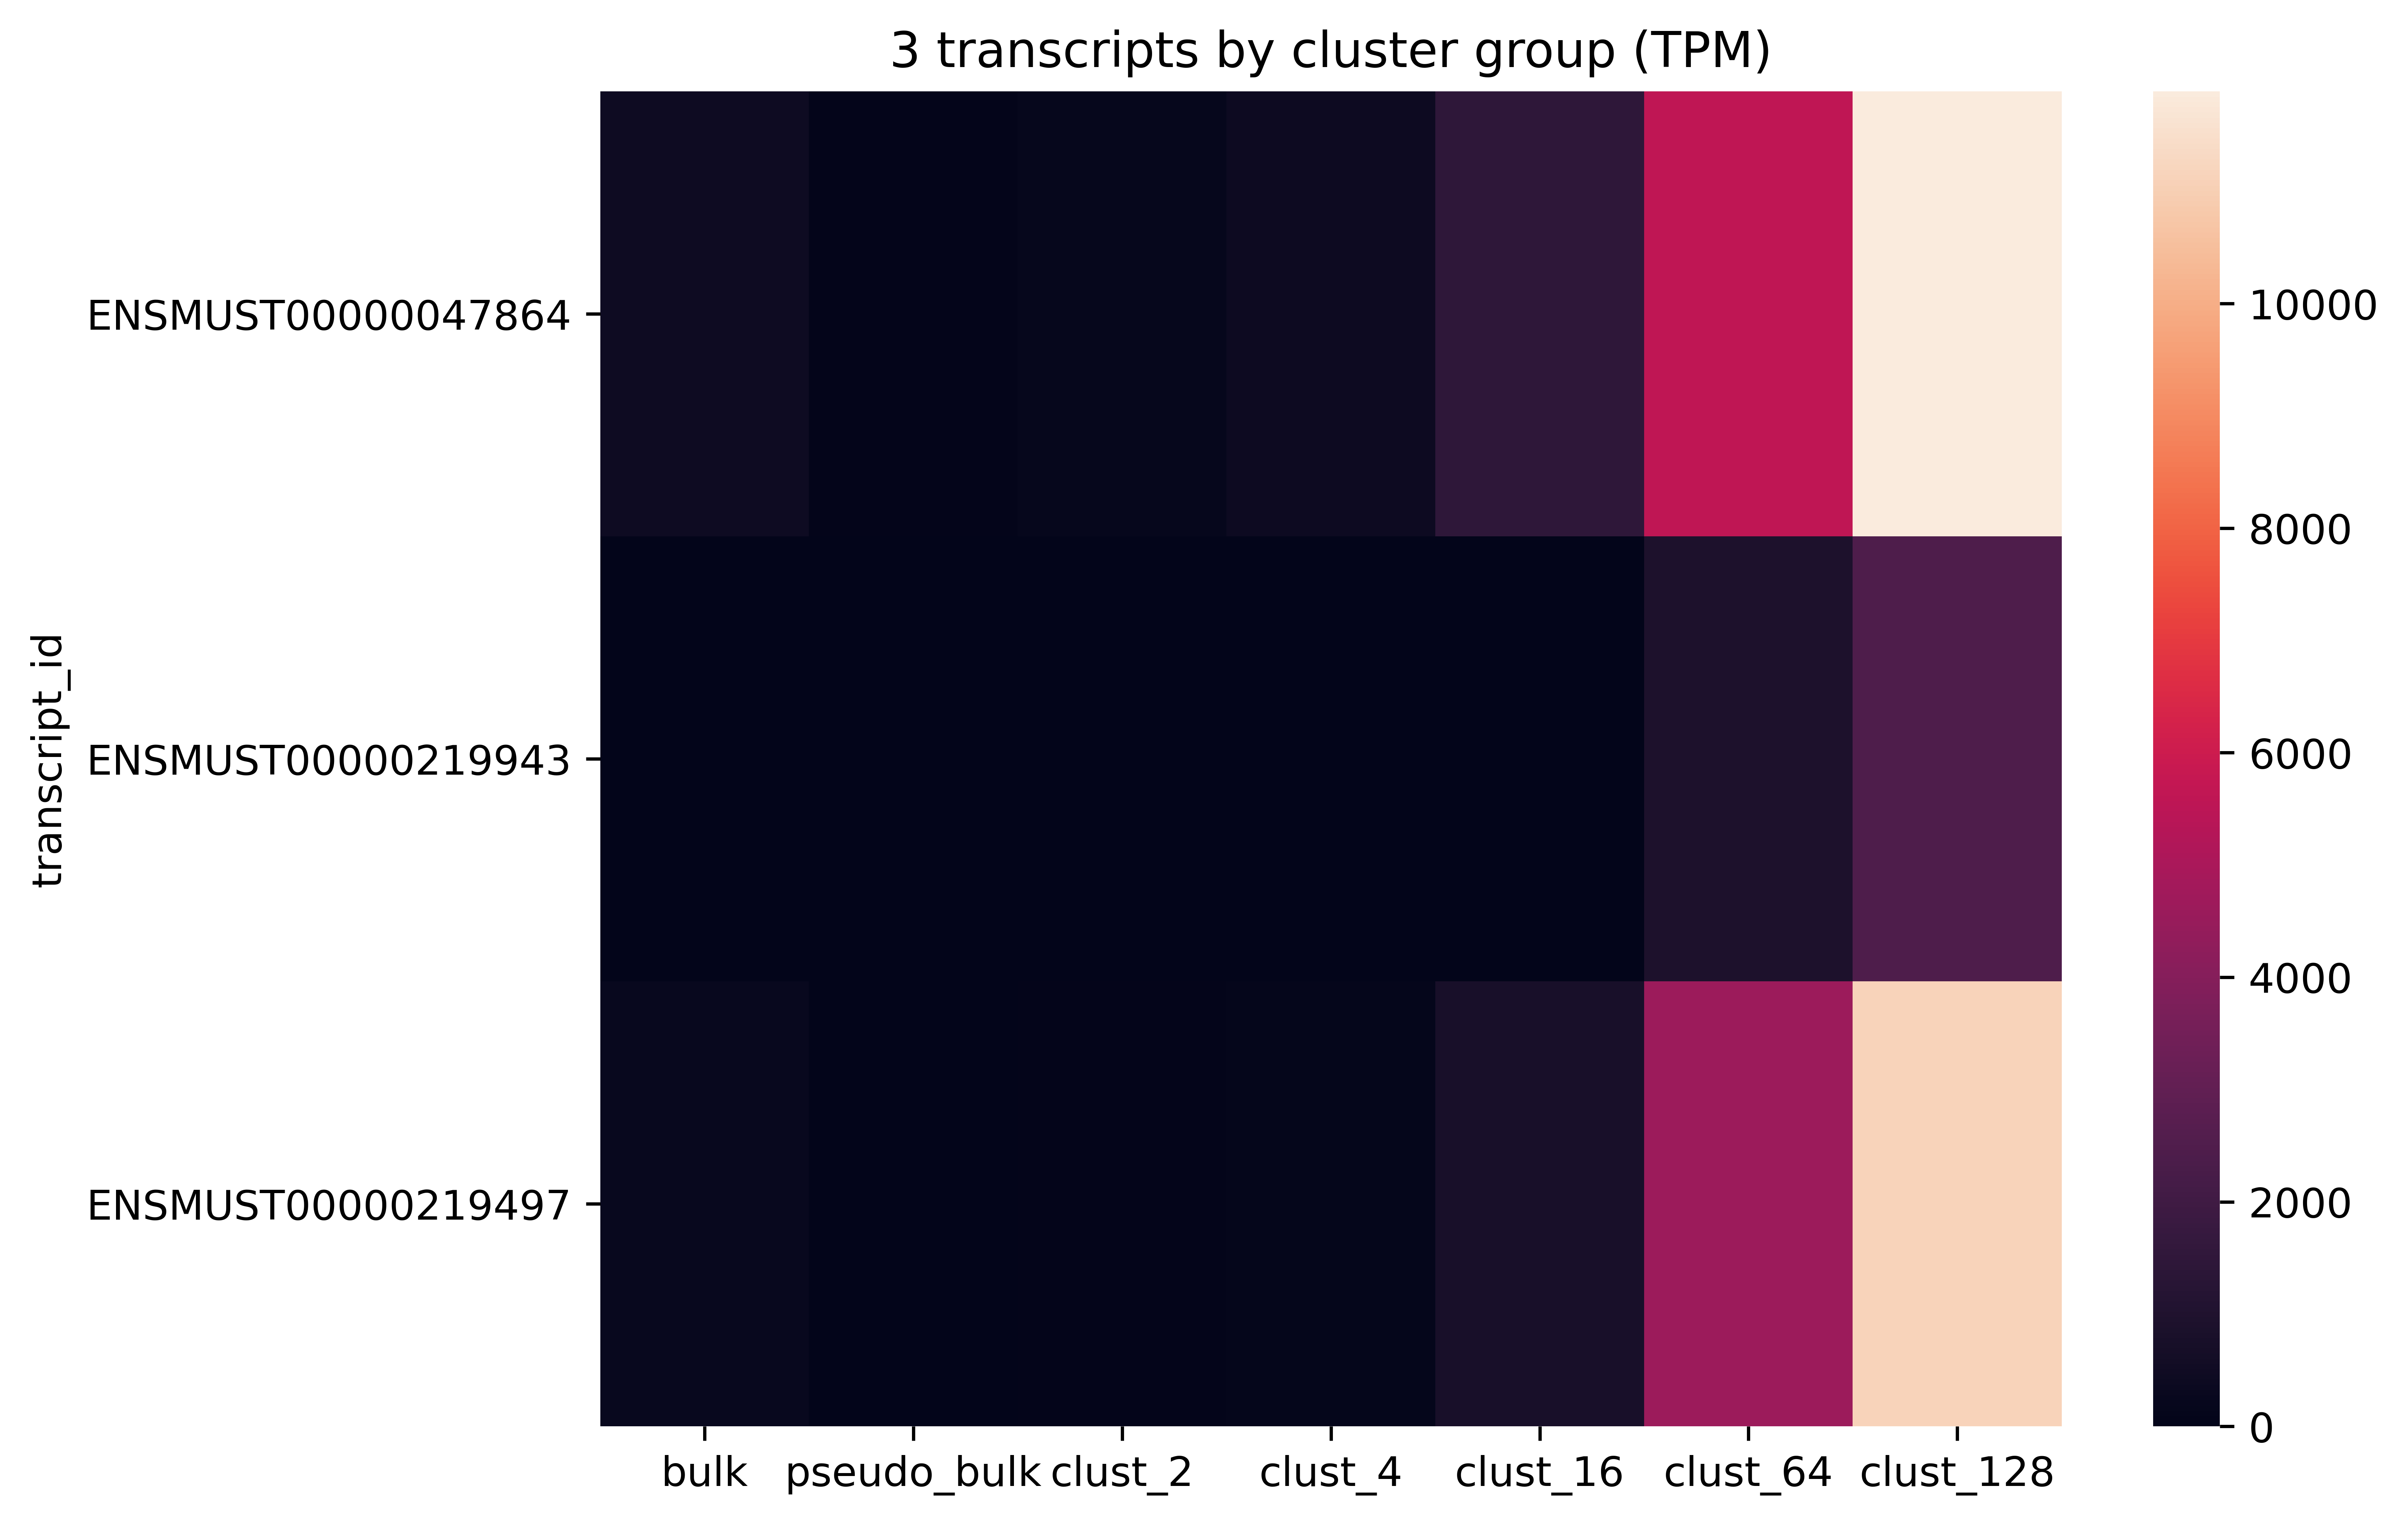

In [13]:
# Get subset of table with only transcripts belonging to a house keeping gene
gene = SN[SN['gene_id'] == 'ENSMUSG00000034994']
gene = gene.drop('gene_id', axis=1)
gene = gene.set_index('transcript_id')

# Plot heatmap with all 3 transcripts vs each cluster
figure(figsize=(8, 6), dpi=800)
sns.heatmap(gene)
plt.title('3 transcripts by individual cluster (TPM)')
plt.show()

# Group clusters by level and take the sum of each transcript
gene_by_clust = pd.DataFrame()

clust_2 = ['N2c0', 'N2c1']
clust_4 = ['N4c0', 'N4c1', 'N4c2', 'N4c3']
clust_16 = ['N16c0', 'N16c1', 'N16c2', 'N16c3', 'N16c4', 'N16c5', 'N16c6', 'N16c7', 'N16c8', 'N16c9', 'N16c10', 'N16c11', 'N16c12', 'N16c13', 'N16c14', 'N16c15']
clust_64 = []
for i in range(64):
    name = 'N64c' + str(i)
    clust_64.append(name)
clust_128 = []
for i in range(128):
    name = 'N128c' + str(i)
    clust_128.append(name)

gene_by_clust['bulk'] = gene['bulk']
gene_by_clust['pseudo_bulk'] = gene['pseudo_bulk']
gene_by_clust["clust_2"] = gene[clust_2].sum(axis=1)
gene_by_clust["clust_4"] = gene[clust_4].sum(axis=1)
gene_by_clust["clust_16"] = gene[clust_16].sum(axis=1)
gene_by_clust["clust_64"] = gene[clust_64].sum(axis=1)
gene_by_clust["clust_128"] = gene[clust_128].sum(axis=1)

# Plot the heatmap with all 3 transcripts vs each cluster LEVEL
figure(figsize=(8, 6), dpi=800)
sns.heatmap(gene_by_clust)
plt.title('3 transcripts by cluster group (TPM)')
plt.show()

Overlapping Sets graph

<ipython-input-10-c58756c2c0ec>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  z.set_xticklabels(['','Bulk', 'Pseudobulk', '2', '4', '16', '64', '128'])


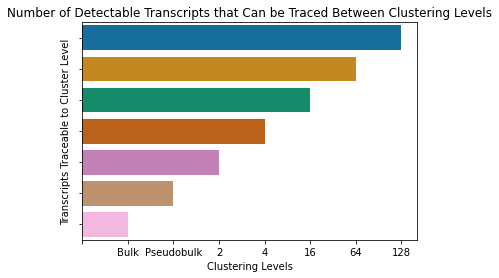

In [10]:
x = [1,2,3,4,5,6,7]
y = [7,6,5,4,3,2,1]
barLabels = ['62362', '43730', '41266','41220','41165','68','63']

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)):
        plt.text(i+.5,y_list[i],barLabels[i-1], ha="center")

z= sns.barplot(x = x, y = y, orient = 'h', palette = 'colorblind')
z.set_xticklabels(['','Bulk', 'Pseudobulk', '2', '4', '16', '64', '128'])
z.set_yticklabels(['','','','','','',''])
#add_value_label(x,y)
plt.ylabel('Transcripts Traceable to Cluster Level')
plt.xlabel('Clustering Levels')
plt.title('Number of Detectable Transcripts that Can be Traced Between Clustering Levels')
plt.show()